In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

Load dataset dengan `pd.read_csv()`. Untuk homework, kita akan menggunakan data kebotakan yang sudah dimodifikasi sehingga berbeda dengan sesi hands-on.

In [3]:
# CODE HERE
misteri=pd.read_csv('misteri.csv')
misteri

,A,B,C,D,E,F
0,52.694032,1.770970e+07,7.0,4.307956e+07,0.0,0.0
1,58.311613,1.649032e+07,0.0,4.179668e+07,0.0,0.0
2,50.306117,1.609868e+07,1.0,4.266504e+07,0.0,NaN
3,52.223764,1.862330e+07,0.0,2.406180e+07,0.0,0.0
4,52.017818,2.070175e+07,NaN,5.429762e+07,0.0,0.0
...,...,...,...,...,...,...
13587,48.106875,1.775518e+07,2.0,5.204040e+07,0.0,0.0
13588,45.921941,1.263316e+07,2.0,7.344896e+06,0.0,0.0
13589,26.396931,1.124139e+07,1.0,1.367920e+07,0.0,0.0
13590,41.909293,1.314148e+07,1.0,2.953154e+07,0.0,0.0


# EDA

## Descriptive Statistics
### Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [4]:
# CODE HERE
misteri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13592 entries, 0 to 13591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       13418 non-null  float64
 1   B       13415 non-null  float64
 2   C       13417 non-null  float64
 3   D       13405 non-null  float64
 4   E       13406 non-null  float64
 5   F       13429 non-null  float64
dtypes: float64(6)
memory usage: 637.2 KB


Apa yang dapat kita pahami?
* Nomor 1 Semua kolom memiliki kolom Null (jumlah Non-Null<jumlah total entries)
* Nomor 2 Semua kolom memiliki tipe float64 (numerical)

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [5]:
# CODE HERE asumsi C,E,F adalah kategorical
numericals=['A','B','D']
categoricals=['C','E','F']

### Sampling untuk memahami data dengan `df.sample()`

Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [88]:
# CODE HERE
misteri.sample(20,random_state=200)

,A,B,C,D,E,F
5951,38.833868,1.532478e+07,1.0,8.926461e+07,1.0,0.0
11087,54.070016,1.843586e+07,4.0,6.653128e+07,0.0,0.0
286,43.622746,1.446657e+07,1.0,1.983641e+07,0.0,0.0
3034,65.262127,2.418171e+07,0.0,1.122061e+08,0.0,1.0
12267,46.824404,1.239701e+07,0.0,NaN,0.0,0.0
9027,63.141565,1.555384e+07,1.0,2.072195e+07,0.0,0.0
1405,49.595060,1.612794e+07,2.0,5.776757e+07,1.0,0.0
7377,55.032968,2.294502e+07,5.0,5.657579e+07,NaN,0.0
11622,57.640201,2.270443e+07,0.0,6.668215e+07,0.0,1.0
11532,49.770747,NaN,3.0,1.578995e+07,0.0,0.0


Beberapa pengamatan:
* Pengamatan 1 Kolom A,B,D merupakan kolom data kontinyu (numerical)
* Pengamatan 2 Kolom C,E,F merupakan kolom data numerical diskrit (bisa jadi ternyata kategorical karena tidak diketahui nature kolomnya, harus dianalisa lebih dalam). Kategorical terbagi 2 yaitu ordinal (ada urutan) dan nominal (hanya nama saja, tanpa urutan, nominalis)

* Pengamatan 1 Kolom A,B,D merupakan kolom data kontinyu (numerical)
* Pengamatan 2 Kolom C,E,F merupakan kolom data numerical diskrit (bisa jadi ternyata kategorical karena tidak diketahui nature kolomnya, harus dianalisa lebih dalam). Kategorical terbagi 2 yaitu ordinal (ada urutan) dan nominal (hanya nama saja, tanpa urutan, nominalis)

### Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [7]:
# CODE HERE
misteri.describe()

,A,B,C,D,E,F
count,13418.000000,1.341500e+04,13417.000000,1.340500e+04,13406.000000,13429.000000
mean,50.604303,1.646446e+07,2.537825,3.522170e+07,0.151574,0.040882
std,7.185786,3.385392e+06,2.830022,2.118154e+07,0.358621,0.198023
min,22.000000,7.540000e+06,0.000000,1.000000e+06,0.000000,0.000000
25%,45.710112,1.405912e+07,1.000000,2.049483e+07,0.000000,0.000000
50%,50.513100,1.612895e+07,2.000000,3.031256e+07,0.000000,0.000000
75%,55.457167,1.854458e+07,4.000000,4.465140e+07,0.000000,0.000000
max,80.000000,3.400000e+07,13.000000,2.340000e+08,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Semua values diperlakukan seperti data kontinyu
* Ada kemungkinan besar kolom E, F adalah data kategori (berupa 0 & 1); 
* Untuk kolom C, sepertinya data diskrit dari 0-13 karena tidak memiliki pecahan. Bisa jadi kolom C ini ternyata adalah kategorical yang 'berindex' nomor?
* Orde kolom B berkisar antara pangkat 6 sampai pangkat 7 (perbedaan 1 orde)
* Orde kolom D berkisar antara pangkat 6 sampai pangkat 8 (perbedaan 2 orde)

Sekarang kita keluarkan *summary* kolom *categorical*

In [8]:
# CODE HERE
misteri[categoricals].describe()

,C,E,F
count,13417.000000,13406.000000,13429.000000
mean,2.537825,0.151574,0.040882
std,2.830022,0.358621,0.198023
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000
max,13.000000,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Pengamatan 1: kolom C,E, F memang masih numerical, kalau kategorical terbagi 2 (ordinal dan nominal). Sifat value kolomnya masih misteri
* Pengamatan 2: kolom C val range 0-13, min=0, Quartil25=1, Quartil50=2, Quartil75= 4, sedangkan max 13. Masih ada sebaran data yang bisa jadi normal. Namun mungkin juga kategorical bila tipenya banyak (seperti penanda pekerjaan)
* Pengamatan 3: kolom E val range 0-1, min=Quartil25=Quartil50=Quartil75= 0, sedangkan max 1. Sebarannya abnormal. Bisa jadi menandakan kategorical Yes/No
* Pengamatan 4: kolom F val range 0-1, min=Quartil25=Quartil50=Quartil75= 0, sedangkan max 1. Sebarannya abnormal. Bisa jadi menandakan kategorical Yes/No

In [14]:
numerical_dtypes=['float64']

num_df=misteri.select_dtypes(include=numerical_dtypes)
numericals=num_df.columns
numericals

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

### Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom *categorical* di atas dengan value counting

In [9]:
# CODE HERE
for ii in misteri[categoricals]:
    mm=ii
    print('value count:','\n',misteri[mm].value_counts())
     


value count: 
 0.0     3347
1.0     3279
2.0     1992
3.0     1333
5.0      723
4.0      667
6.0      626
7.0      577
8.0      475
12.0     264
13.0     134
Name: C, dtype: int64
value count: 
 0.0    11374
1.0     2032
Name: E, dtype: int64
value count: 
 0.0    12880
1.0      549
Name: F, dtype: int64


In [10]:
for ii in misteri[categoricals]:
    mm=ii
    print('values',mm,'unique :\n',misteri[mm].unique())


values C unique :
 [ 7.  0.  1. nan  4.  3.  2. 12.  8.  6.  5. 13.]
values E unique :
 [ 0.  1. nan]
values F unique :
 [ 0. nan  1.]


Seperti yang bisa dilihat, pengamatan kita dari `df.describe()` tadi ternyata adalah (SALAH) karena:
* Nilai 0 dan 1 pada kolom EF kemungkinan besar merupakan data kategorical berupa Yes/No karena binary. Walaupun begitu bentuk data masih diskrit numerik.
* Nilai 0-13 pada kolom C bisa jadi merupakan data kategorical atau diskrit nominal, tergantung interpretasi kolom

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

Kita tampilkan box plot untuk setiap kolom *numeric* kita:

In [24]:
# CODE HERE
yy=0
col_numericals=misteri[numericals]
#fig, axes = plt.subplots(len(numericals), 1)
col_numericals
#for zz in numericals:
 #   val_numericals = col_numericals(zz) 


,A,B,D
0,52.694032,1.770970e+07,4.307956e+07
1,58.311613,1.649032e+07,4.179668e+07
2,50.306117,1.609868e+07,4.266504e+07
3,52.223764,1.862330e+07,2.406180e+07
4,52.017818,2.070175e+07,5.429762e+07
...,...,...,...
13587,48.106875,1.775518e+07,5.204040e+07
13588,45.921941,1.263316e+07,7.344896e+06
13589,26.396931,1.124139e+07,1.367920e+07
13590,41.909293,1.314148e+07,2.953154e+07


A 0
B 1
D 2


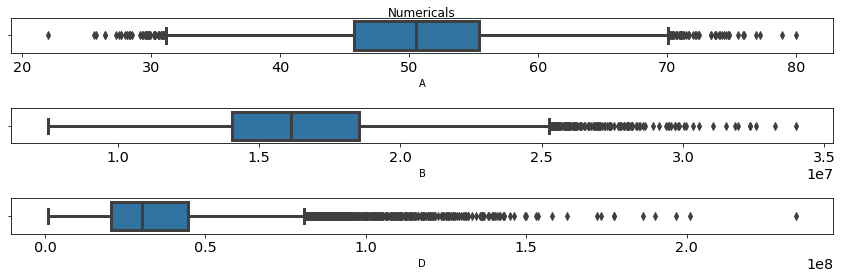

In [73]:
fig, axes = plt.subplots(len(numericals), 1)

fig.suptitle('Numericals')
yy=0
for zz in numericals:
    
    sns.boxplot(misteri[zz],ax=axes[yy])
    print(zz,yy)  #for debugging purpose
    axes[yy].set_xlabel(zz);
    yy=yy+1
    
fig.tight_layout(pad=1.7);

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier. Dari data di atas:
* Outlier untuk kolom A terdiri di dua sisi
* Outlier untuk kolom B terdapat di sisi kanan Q3+1.5IQR
* Outlier untuk kolom D terdapat di sisi kanan Q3+1.5IQR

### Dist plots

Kita tampilkan dist plot untuk setiap kolom *numeric* kita:

A 0
B 1
D 2


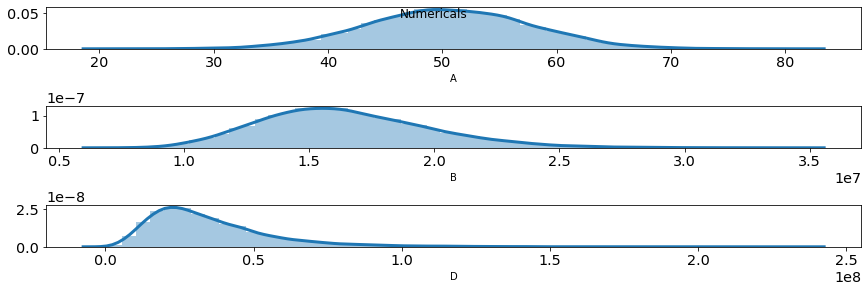

In [83]:
# CODE HERE
fig, axes = plt.subplots(len(numericals), 1)

fig.suptitle('Numericals')
yy=0
for zz in numericals:
    
    sns.distplot(misteri[zz],ax=axes[yy])
    print(zz,yy)  #for debugging purpose
    axes[yy].set_xlabel(zz);
    yy=yy+1
    
fig.tight_layout(pad=0.5);

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Pengamatan 1: Fitur A terdistribusi normal
* Pengamatan 2: Fitur B terdistribusi skew positif (mean>median)
* Pengamatan 3: Fitur D terdistribusi skew positif (mean>median)

### Violin plots

Alternatif dari kedua plot di atas adalah Violin Plot.

A 0
B 1
D 2


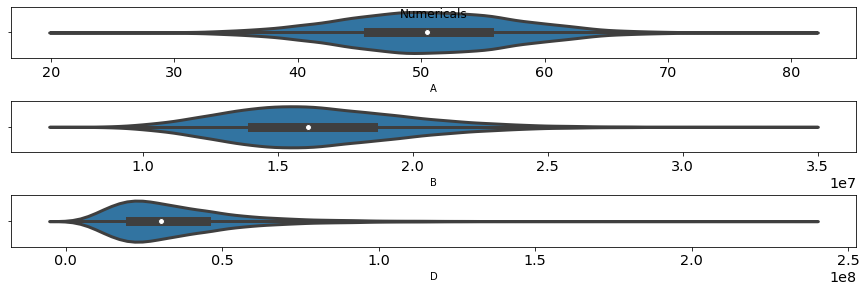

In [85]:
# CODE HERE
fig, axes = plt.subplots(len(numericals), 1)

fig.suptitle('Numericals')
yy=0
for zz in numericals:
    
    sns.violinplot(misteri[zz],ax=axes[yy])
    print(zz,yy)  #for debugging purpose
    axes[yy].set_xlabel(zz);
    yy=yy+1
    
fig.tight_layout(pad=0.5);

Apakah violin plot menunjukkan hal yang sama dengan box/dist plot? (YA)

### Count plot (categorical)

Untuk data *categorical*, kita dapat menampilkan count plot.

C 0
E 1
F 2


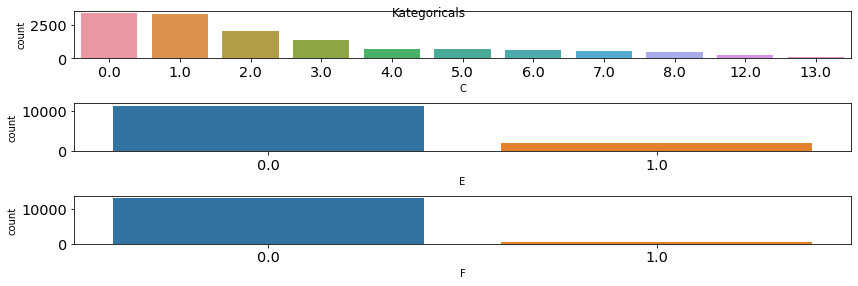

In [134]:
# CODE HERE
fig, axes = plt.subplots(len(categoricals), 1)

fig.suptitle('Kategoricals')
vv=0
for cc in categoricals:
    
    sns.countplot(misteri[cc],ax=axes[vv])
    print(cc,vv)  #for debugging purpose
    axes[vv].set_xlabel(cc);
    vv=vv+1

fig.tight_layout(pad=1);

Apa yang dapat kita simpulkan dari count plot?
* Pengamatan 1:Fitur C memiliki value yang sangat timpang, semakin tinggi valuenya, semakin kecil jumlahnya terutama di sblh kanan  
* Pengamatan 2: Fitur E,F masing-masing memiliki nilai 0 dan 1 yang sangat timpang. Value 1 sangat sedikit

In [ ]:
* Pengamatan 1 Kolom A,B,D merupakan kolom data kontinyu (numerical)
* Pengamatan 2 Kolom C,E,F merupakan kolom data numerical diskrit (bisa jadi ternyata kategorical karena tidak diketahui nature kolomnya, harus dianalisa lebih dalam). Kategorical terbagi 2 yaitu ordinal (ada urutan) dan nominal (hanya nama saja, tanpa urutan, nominalis)
* Pengamatan 1: kolom C,E, F memang masih numerical, kalau kategorical terbagi 2 (ordinal dan nominal). Sifat value kolomnya masih misteri
* Pengamatan 2: kolom C val range 0-13, min=0, Quartil25=1, Quartil50=2, Quartil75= 4, sedangkan max 13. Masih ada sebaran data yang bisa jadi normal. Namun mungkin juga kategorical bila tipenya banyak (seperti penanda pekerjaan)
* Pengamatan 3: kolom E val range 0-1, min=Quartil25=Quartil50=Quartil75= 0, sedangkan max 1. Sebarannya abnormal. Bisa jadi menandakan kategorical Yes/No
* Pengamatan 4: kolom F val range 0-1, min=Quartil25=Quartil50=Quartil75= 0, sedangkan max 1. Sebarannya abnormal. Bisa jadi menandakan kategorical Yes/No
Apa yang dapat kita simpulkan dari count plot?
* Pengamatan 1:Fitur C memiliki value yang sangat timpang, semakin tinggi valuenya, semakin kecil jumlahnya terutama di sblh kanan  
* Pengamatan 2: Fitur E,F masing-masing memiliki nilai 0 dan 1 yang sangat timpang. Value 1 sangat sedikit

## Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

Correlation heatmap dapat ditampilkan melalui fungsi `sns.heatmap()` dengan menggunakan data korelasi yang dihasilkan melalui `df.corr()`. 

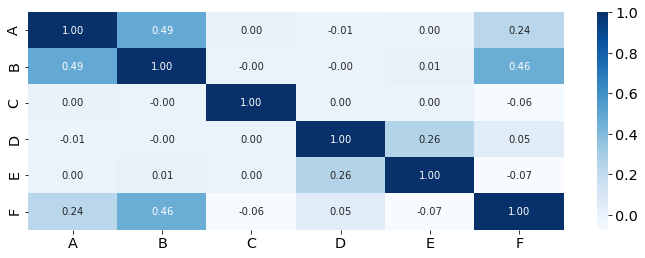

In [62]:
# CODE HERE
# CODE HERE
sns.heatmap(misteri.corr(),cmap='Blues',annot=True,fmt='.2f')

#### Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Pengamatan 1: Fitur C memiliki korelasi yang sangat lemah dengan semua kolom lainnya 
* Pengamatan 2: Fitur A dengan Fitur B memiliki korelasi yang paling besar 0.49
* Pengamatan 3: Fitur B dengan Fitur F memiliki korelasi kedua terbesar 0.46 
* Pengamatan 4: Tidak ada fitur yang korelasinya >0.7

### Pair plot

Apabila angka pada correlation heatmap agak sulit untuk dicerna, kita dapat menampilkan *scatter plot* untuk semua kombinasi *feature numeric*. Hal ini dilakukan dengan menggunakan `sns.pairplot()`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


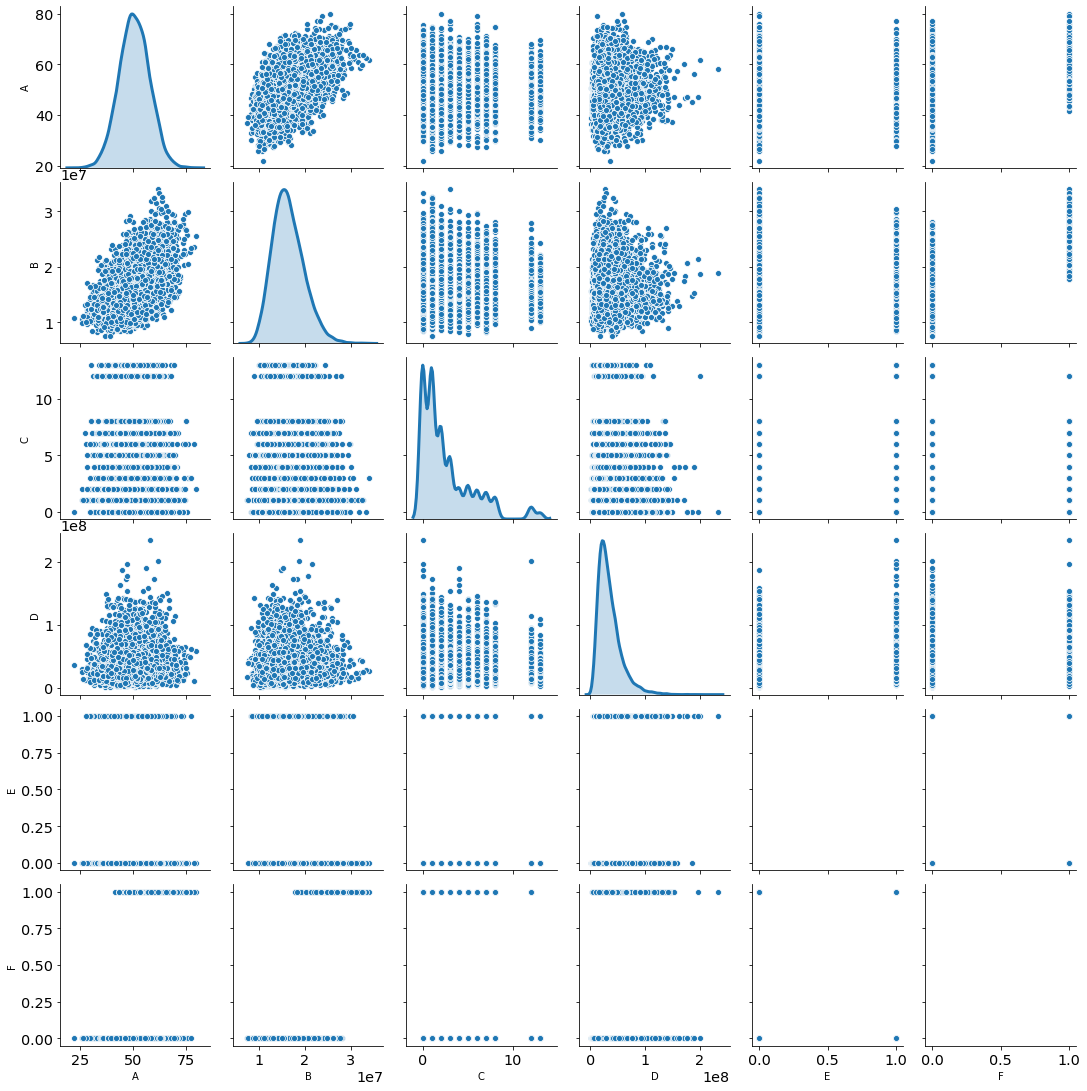

In [60]:
# CODE HERE
# CODE HERE
sns.pairplot(misteri,diag_kind='kde');

Dari pair plot di atas, kita dapat melihat:
* Pengamatan 1: Fitur A&B terlihat korelasi linear
* Pengamatan 2: Fitur F&B terlihat berkorelasi positif. Nilai F=0 korelasi dengan B yg bernilai rendah. Nilai F=1 korelasi dengan B yg bernilai tinggi

### Category plots

Terakhir kita tampilkan *category plot* untuk setiap pasangan kategori *numeric* dan *categorical* seperti di bawah ini

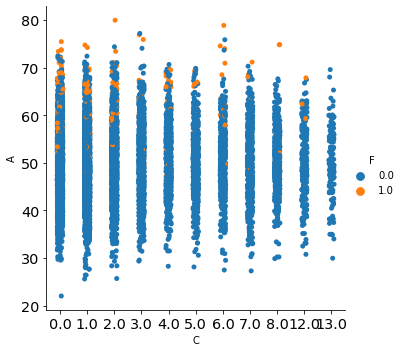

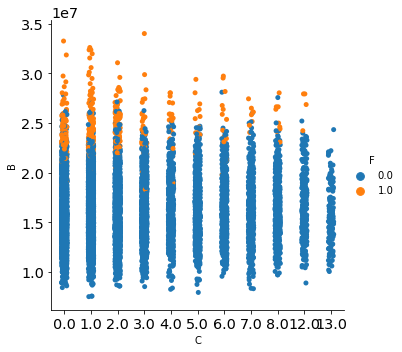

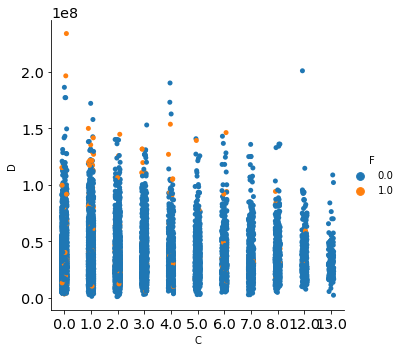

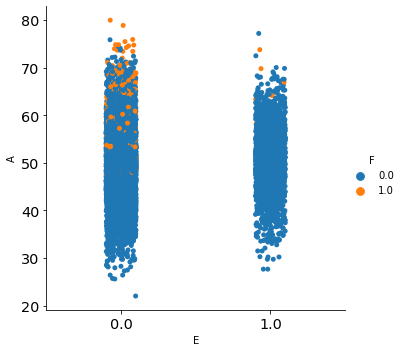

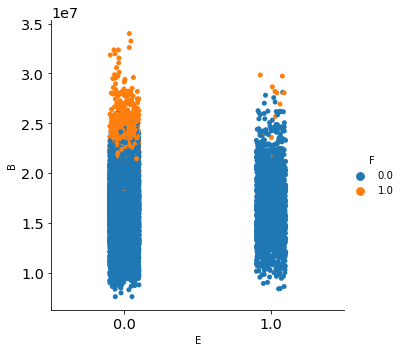

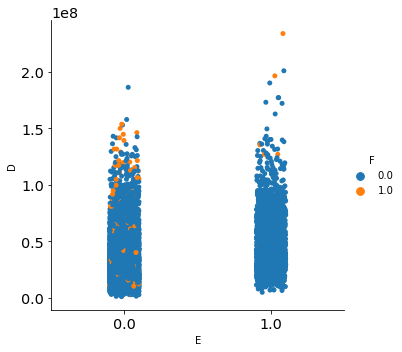

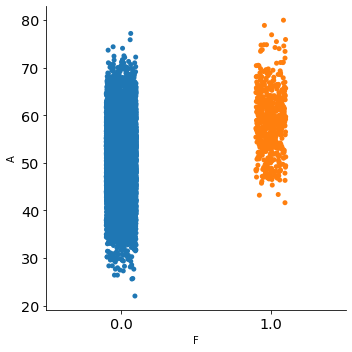

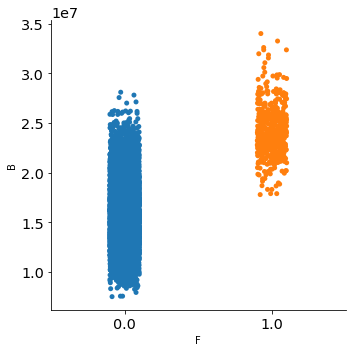

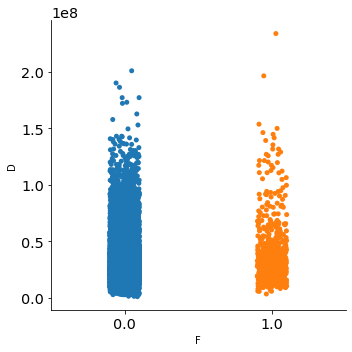

In [135]:
for jj in categoricals:
    for kk in numericals: 
        sns.catplot(data=misteri,x=jj,y=kk, hue='F');
        

Dari semua *category plot* di atas, hal yang cukup penting untuk diingat adalah:
* Pengamatan 1: Count sample F=1 memilki jumlah yang sangat sedikit dibandingkan F=0
* Pengamatan 2: Sama seperti pengamatan Pair Plot. Nilai F=0 berkorelasi pada B yang rendah. Nilai F=1 berkorelasi pada B yang tinggi

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Conclusion 1: Harus berhati-hati terhadap kelas sampel F=1 yang berjumlah cukup kecil dibandingkan kelas sampel F=0
* Conclusion 2: * Pengamatan 2: Fitur A dengan Fitur B memiliki korelasi yang paling besar 0.49, akan tetapi data kontinyu
* Conclusion 3: Fitur B dengan Fitur F memiliki korelasi kedua terbesar 0.46 
* Conclusion 4: Akan dicoba pengolahan antara B&F dan A&B. Kemungkinan F terlebih dahulu karena terlihat lebih mudah sebagai target (kategorical)
* Conclusion 5: Nilai F=0 berkorelasi B dengan value rendah. Nilai F=1 korelasi B dengan value tinggi, bisa dicoba untuk melakukan data pre-processing di B. Selanjutnya fokus data pre-processing di A jika diperlukan